# Árboles de decisión

El objetivo de este notebook es entender con más detalle cómo funciona un árbol de decisión. Para ello, seguiremos trabajando con el dataset de Titanic y luego con el Iris Dataset. El notebook está dividido en cuatro partes. 

1. Construcción de un árbol de decisión *a mano*.
2. Cálculo de Impureza y Ganancia Gini
3. Árboles de Decisión en Scikit-Learn + *train/test split*
4. Iris Dataset.

## 1. Construcción de un árbol de decisión *a mano*

**NOTA**: LEER HASTA EL FINAL ANTES DE MODIFICAR EL CÓDIGO.

En primer lugar, vamos a definir algunas funciones.

1. La función `accuracy`, dada las etiquetas que ustedes predigan y las etiquetas reales, calcula la medida de performance, en este caso, la exactitud. **No la tienen que modificar**.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
def accuracy(y_predicted, y_real):
    return sum([y_i == y_j for (y_i, y_j) in zip(y_predicted, y_real)])/len(y_real)

2. La función `predict_instance`, dada una instancia x con sus atributos, predice si sobrevivió o no. **Es la única función que tendrán que modificar**.

In [3]:
def predict_instance(data):
    '''
    Modificar las siguientes líneas de codigo. 
    Este será su algoritmo algoritmo para predecir si sobrevivirá o no por instancia.
    La variable prediction debe contener la etiqueta 0 o 1 
    
    Algunas opciones son: predecir que nadie sobrevivio, que todos sobrevivieron,
    predecir al azar, y usar lo aprendido cuando exploramos el dataset de Titanic
    '''
    prediction = 0 # cambiar
    
    #### UNA POSIBLE FORMA DE EMPEZAR:
    # if x.Age < 12:
    #     prediction = 1
    # else:
    #     prediction = 0
    ## FIN DE COMPLETAR
    if data.Age < 12:
        prediction = 1
    elif (data.Age > 12 and data.Pclass < 3) and data.Sex == 'female':
        prediction = 1
    else:
        prediction = 0
        

    return prediction

3. Por último, la función `predict` toma todo las instancias X y, usando la función que definieron antes, predice para cada una de ellas si sobrevivió o no. **No la tienen que modificar**.

In [4]:
def predict(X):
    y_predicted = []
    for x in X.itertuples(): 
        y_i = predict_instance(x) 
        y_predicted.append(y_i)
    return y_predicted

**Consigna**

* Cargar el dataset de Titanic y separar en una variable `X` los atributos que usaremos para predecir, y en una variable `y` la etiqueta que queremos predecir. En este caso, si sobrevivió o no.

In [5]:
import pandas as pd

df = pd.read_csv('../csv/DS_Clase_05_titanic.csv')
df.dropna(subset=['Age', 'Sex', 'Pclass'], inplace=True)
X = df[['Age', 'Sex', 'Pclass']]
y = df.Survived
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* Usar los datos `X` para predecir si los pasajeros sobrevivieron o no.head

In [6]:
y_pred = predict(X)
print(y_pred)

[0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 

* Calcular la medida de performance entre las etiquetas reales `y` y las etiquetas predichas `y_pred`

In [7]:
print("Accuracy final: ", round(accuracy(y_pred, y), 3))

Accuracy final:  0.796


In [8]:
x, y1 = y.value_counts()
print(x, y1)

print(y.count())

424 290
714


**Ejercicio**: modificar `predict_instance` de forma tal de mejorar el resultado recién obtenido.

**Para pensar:** las performances asociadas a predecir todos `0` (nadie sobrevivió), todos `1` (todos sobrevivieron) y predecir al azar son muy importantes para evaluar nuestro trabajo. ¿Por qué?

## 2. Cálculo de Impureza y Ganancia Gini

Ahora vamos a calcular cuán buena es la *pregunta* del género y clase para separar las muestras usando la impureza Gini. Para ello:

**Ejercicio:** calcular la impureza inicial del dataset. Ayuda: recordar que en la variable `y` ya separaron las etiquetas. Si es un objeto de Pandas, tal vez la función `value_counts()` puede ser útil. 

In [9]:
def calcularGini(muestras_neg, muestras_pos, N):
    return 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2

In [10]:
muestras_neg, muestras_pos = y.value_counts()
N = y.count()
gini_inicial = calcularGini(muestras_neg, muestras_pos, N)

In [11]:
print(gini_inicial)

0.48238903404499056


**Ejercicio:** calcular la impureza Gini luego de separar por el género. Recuerden que tienen que calcular la impureza en dos hojas - una correspondiente a género masculino y otras femenino - y luego hacer un promedio ponderado. Para eso, puede ser conveniente crear una máscara y reciclar código anterior.

In [12]:
mascara = df.Sex == 'female'
y_female = y[mascara]
y_male = y[~mascara]

print(y_female.count(), y_male.count())

261 453


In [13]:
muestras_neg, muestras_pos = y_female.value_counts()
N = y_female.count()
gini_female = calcularGini(muestras_neg, muestras_pos, N)
print(gini_female)

0.37016485371618146


In [14]:
muestras_neg, muestras_pos = y_male.value_counts()
N = y_male.count()
gini_male = calcularGini(muestras_neg, muestras_pos, N)
print(gini_male)

0.32630147800535075


In [15]:
print('Impureza Gini al separar por Genero:',(y_female.count()*gini_female + y_male.count()*gini_male)/y.count())

Impureza Gini al separar por Genero: 0.3423355691265368


**Ejercicio:** calcular la impureza Gini luego de separar por clase. Recuerden que tienen que calcular la impureza en tres hojas y luego hacer un promedio ponderado. Para eso, puede ser conveniente crear tres máscaras y reciclar código anterior.

In [16]:
mascara = df.Pclass == 1
y_1 = y[mascara]

In [17]:
muestras_neg, muestras_pos = y_1.value_counts()
N = y_1.count()
gini_1 = calcularGini(muestras_neg, muestras_pos, N)
print(gini_1)

0.45138166261995605


In [18]:
mascara = df.Pclass == 2
y_2 = y[mascara]

In [19]:
muestras_neg, muestras_pos = y_2.value_counts()
N = y_2.count()
gini_2 = calcularGini(muestras_neg, muestras_pos, N)
print(gini_2)

0.49918139597046346


In [20]:
mascara = df.Pclass == 3
y_3 = y[mascara]

In [21]:
muestras_neg, muestras_pos = y_3.value_counts()
N = y_3.count()
gini_3 = calcularGini(muestras_neg, muestras_pos, N)
print(gini_3)

0.36421344971235864


In [22]:
print('Impureza Gini al separar por clase:', (y_1.count()*gini_1 +
                                              y_2.count()*gini_2 +
                                              y_3.count()*gini_3)/y.count())

Impureza Gini al separar por clase: 0.41962345293850045


**¿Cuál tiene una mayor ganancia Gini?¿Concuerda con lo visto hasta ahora?**

**Para pensar:** ¿cómo modificarían el código para calcular la ganancia Gini al separar por edad? Por ejemplo, al separar por mayor de 12 años y menor de 12 años.

In [23]:
mascara = df.Age < 12
y_nino = y[mascara]
y_no_nino = y[~mascara]

print(y_nino.count(), y_no_nino.count())

68 646


In [24]:
muestras_neg, muestras_pos = y_nino.value_counts()
N = y_nino.count()
gini_nino = calcularGini(muestras_neg, muestras_pos, N)
print(gini_nino)

0.4891868512110727


In [25]:
muestras_neg, muestras_pos = y_no_nino.value_counts()
N = y_no_nino.count()
gini_no_nino = calcularGini(muestras_neg, muestras_pos, N)
print(gini_no_nino)

0.4751555176413078


In [26]:
print('Impureza Gini al separar por edad:',(y_nino.count()*gini_nino + y_no_nino.count()*gini_no_nino)/y.count())

Impureza Gini al separar por edad: 0.47649183512414256


## 3. Árboles de Decisión en Scikit-Learn + *train/test split*

Nuevamente, vamos a trabajar con el dataset del Titanic. La consigna consiste en entrenar los mismos modelos de la clase 15 (en el sentido de usar el mismo preprocesamiento y los mismos atributos), pero separando los conjuntos de Train y Test. Además, evaluar los modelos en esos conjuntos. Entonces: reciclar el código del Notebook de la clase anterior y agregar un `train_test_split`, predecir sobre `X_train` y `X_test` y evaluar el desempeño de los modelos sobre esos conjuntos. Dejamos el *esqueleto* de algunas celdas que les pueden servir. 

Una vez que obtengan los desempeños sobre cada set y modelo, modificar el parámetro `max_depth` del `DecisionTreeClassifier` y volver a entrenar y evaluar. Prestar atención a las diferencias de desempeño en cada conjunto. ¿Qué está ocurriendo?

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [28]:
from sklearn.model_selection import train_test_split
df['Sex'] = le.fit_transform(df['Sex'])
X_train, X_test, y_train, y_test = train_test_split(df[['Pclass','Sex', 'Fare']], df['Survived'])

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Creamos un objeto arbol
tree = DecisionTreeClassifier(max_depth=3)

In [30]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = tree.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train, y_train_pred))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test, y_test_pred))

# Cuando aumentamos el max_depth aumenta la precision del modelo

Accuracy sobre conjunto de Train: 0.794392523364486
Accuracy sobre conjunto de Test: 0.8156424581005587


## 4. Iris Dataset

Entrenar un `DecisionTreeClassifier` sobre el Iris Dataset. Dejamos algunas consignas de guía.

**Ejercicio**: importar los datos, descartar las columnas que no agreguen información y hacer una `pairplot`

In [32]:
df = pd.read_csv('../csv/iris.csv')
df[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
df.drop(labels='Id', axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Para pensar**: ¿Son separables las especies?¿Cuáles serán más fáciles de separar?¿Con qué atributos?

**Ejercicio**: separar del dataframe los features y las etiquetas. Llamar `X` a los features e `y` a las etiquetas. Elegir qué features usar (pueden ser todos). Fijarse si es necesario transformar las etiquetas o si Scikit-Learn puede trabajar con ellas.

In [33]:
X = df[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

print (df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [34]:
y = df['Species']

In [35]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Ejercicio**: separar en conjuntos de Train y Test

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(y_train)

4          Iris-setosa
93     Iris-versicolor
22         Iris-setosa
137     Iris-virginica
25         Iris-setosa
            ...       
128     Iris-virginica
20         Iris-setosa
18         Iris-setosa
121     Iris-virginica
110     Iris-virginica
Name: Species, Length: 112, dtype: object


**Ejercicio**: importar un DecisionTreeClassifier de Scikit-Learn

In [37]:
from sklearn.tree import DecisionTreeClassifier


**Ejercicio**: crear un DecisionTreeClassifier con max_depth = 2.

In [56]:
# Creamos un objeto arbol
tree = DecisionTreeClassifier(max_depth=2)

**Ejercicio**: entrenar el DecisionTreeClassifier que crearon.

In [57]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Ejercicio**: explorar algunas características del modelo entrenado.

In [58]:
print(tree.classes_)
print(tree.n_classes_)
print(tree.max_features_)
print(tree.feature_importances_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
3
4
[0. 0. 0. 1.]


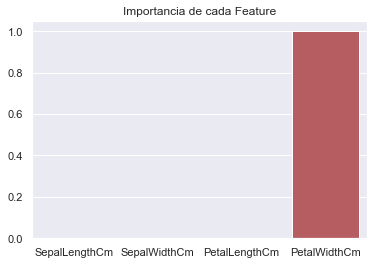

In [59]:
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

**Ejercicio**: predecir con el modelo las etiquetas en el conjunto de Train y de Test. ¿Cómo son las etiquetas?

In [42]:
# Predecimos sobre nuestro set de train
y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = tree.predict(X_test)


**Ejercicio**: evaluar la performance del modelo.

In [43]:
# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred, y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred, y_test))

Accuracy sobre conjunto de Train: 0.9910714285714286
Accuracy sobre conjunto de Test: 0.9210526315789473


**Ejercicio**: ¿Qué ocurre con el desempeño a medida que aumentan `max_depth`? Volver a correr todas las celdas, pero inicializando el `DecisionTreeClassifier` con valores más altos de max_depth.

**Ejercicio**: leer el código de la siguiente celda y tratar de entenderlo. Modificar `max_depth` y fijarse cómo se modifican las fronteras de decisión obtenidas.

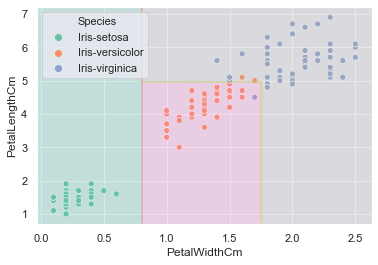

In [44]:
## Creamos el clasificador
clf = DecisionTreeClassifier(max_depth = 3)

# # Modificamos un poco los datos para poder graficar
y_train = y.map({'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2})

# Entrenamos
clf.fit(X[['PetalWidthCm', 'PetalLengthCm']], y_train)

# Graficamos los datos y las fronteras creadas
plt.figure()
ax = sns.scatterplot(X.PetalWidthCm, X.PetalLengthCm, hue=y, palette='Set2')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.show()